https://cnvrg.io/cnn-tensorflow/
* Convolution Neural Network
* Convolution 과정을 통해 이미지의 특징을 추출
* Feature map : 이미지의 특징을 추출하여 저장한 또 다른 이미지
* Feature detector : kernel, filter, 3x3 matrix
* 필터와 이미지 데이터의 곱셈, 그 결과를 합산(내적)하여 Feature map 산출
* 위의 내적 연산을 하면서 옆으로 이동하면서 다시 곱셈 수행
* Strides로 필터의 이동 폭 조절 가능
* 필터는 CNN 생성시 정의 가능
* 필터 연산을 마치면 이미지의 특징은 feature map 에 남고 크기는 축소
* Pooling(max-pooling, average-pooling, min-pooling) : 결과는 pooled feature map
* Pooling 과정을 거치면 특징은 pooled feature map 에 남고 크기는 더 축소됨
* Flattening : pooled feature map을 1차원으로 변환하여 전결합층에 전달 준비
* Fully connected layer: 일반 신경망으로 구성되어 학습이 수행되는 단계
* 출력 : 이진분류라면 sigmoid, 다중분류라면 softmax 같은 활성함수 사용
* filter적용 -> pooling -> filter 적용 -> pooling 반복, -> flatten -> fully conn layer

In [1]:
# Keras MNIST CNN example

import numpy as np
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras import layers
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

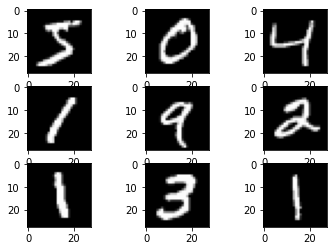

In [3]:
# 로드된 숫자 이미지 9개만 화면에 표시해본다
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Scale images to the [0, 1] range
# 학습속도와 정확도를 향상시키기 위한 정규화(Normalization)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)   # (60000, 28, 28, 1)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = keras.Sequential()
model.add( Input(shape=input_shape))
model.add( Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Flatten())
model.add( Dropout(0.5))
model.add( Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
# add()사용하는 대신에 아래처럼 신경망을 구성할 수도 있다
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 18s 41ms/step - loss: 0.3677 - accuracy: 0.8910 - val_loss: 0.0834 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 16s 39ms/step - loss: 0.1106 - accuracy: 0.9654 - val_loss: 0.0548 - val_accuracy: 0.9858
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0808 - accuracy: 0.9750 - val_loss: 0.0467 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0704 - accuracy: 0.9781 - val_loss: 0.0416 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.0369 - val_accuracy: 0.9910
Epoch 6/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0377 - val_accuracy: 0.9888
Epoch 7/15
422/422 [==============================] - 17s 39ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0341 - val_accuracy:

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

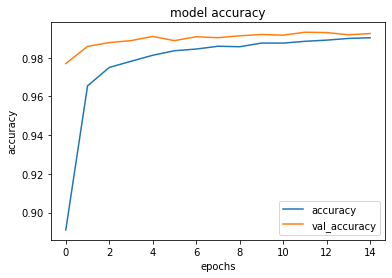

In [14]:
import matplotlib.pyplot as plt

plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

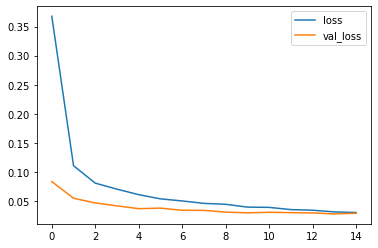

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.021630510687828064
Test accuracy: 0.9932000041007996


In [18]:
x_test.shape   # (10000, 28, 28, 1)
model.predict(x_test[0].reshape(-1,28,28,1))   # 4차원 구조로 변경

1/1 [==============================] - 0s 80ms/step


array([[6.1643712e-10, 1.5442845e-09, 9.4142479e-06, 2.7608296e-06,
        4.2589821e-12, 1.2154419e-10, 1.2479177e-15, 9.9998736e-01,
        7.8256246e-09, 4.3919721e-07]], dtype=float32)

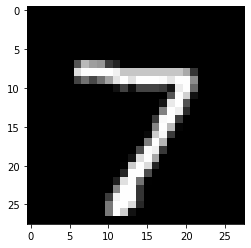

In [19]:
import matplotlib.pyplot as plt

# 픽셀데이터를 2차원 구조로 변경하여 화면에 표시
plt.imshow(x_test[0].reshape(-1,28), cmap=plt.get_cmap('gray'))
plt.show()